In [2]:
from matplotlib import pyplot as plt
import torch

from tqdm.auto import tqdm

from DataSetLoaders import ChessRec_Dataset

import sys
sys.path.append('BoardDetector_Yolo')
import ChessLens

from Utils import ChessUtils

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
dataset = ChessRec_Dataset.ChessRecDataset(label_key="fen", transform_fn=ChessRec_Dataset.img_transform((3000,4000)))
dataloader = dataset.getLoader(1)

In [5]:
img = ChessLens.ChessLensImage()
CU = ChessUtils.ChessTensorUtils()

In [6]:
def compare_matricies(m1, m2):
    return (m1 != m2).sum().item()

In [7]:
errs = []

In [14]:
# for i in tqdm(range(min(len(dataset), 30))):
for i in tqdm(range(60,len(dataset))):
    try:
        X, fen = dataset[i]
        X = X.to(device)

        X = X.permute(1, 2, 0)
        fen = fen

        if (X.max() <= 1):
            X = X * 255
            X = X.to(torch.uint8)

        img.load_image(X)
        img.detect_board()
        img.recognize_pieces()

        matrix = CU.onehot_to_int(CU.FENtoTensor(fen))
        err = compare_matricies(img.piece_matrix, matrix)
        print(f"Error: {err}")

        # plt.figure(figsize=(18,6))
        # plt.subplot(1,3,1)
        # plt.imshow(X);
        # plt.subplot(1,3,2)
        # img.preview_board();
        # plt.subplot(1,3,3)
        # img.save_fen_image()
        # plt.imshow(plt.imread("out_fen.png"));

        errs.append(err)
    except Exception as e:
        pass

    # break

  0%|          | 0/34 [00:00<?, ?it/s]


0: 640x640 1 chessboard, 1776.7ms
Speed: 0.0ms preprocess, 1776.7ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 black-bishop, 1 black-king, 1 black-knight, 6 black-pawns, 1 black-queen, 2 black-rooks, 1 white-bishop, 1 white-king, 1 white-knight, 6 white-pawns, 3 white-rooks, 904.1ms
Speed: 3.7ms preprocess, 904.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Error: 1

0: 640x640 1 chessboard, 723.1ms
Speed: 0.0ms preprocess, 723.1ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 3 black-kings, 5 black-pawns, 1 black-queen, 3 black-rooks, 1 white-king, 2 white-knights, 4 white-pawns, 1 white-queen, 2 white-rooks, 936.2ms
Speed: 3.9ms preprocess, 936.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Error: 1

0: 640x640 1 chessboard, 825.0ms
Speed: 0.0ms preprocess, 825.0ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 black-bishop, 1 black-king, 2 

In [18]:
sum(errs) / len(errs), len(errs)

(3.7191011235955056, 89)

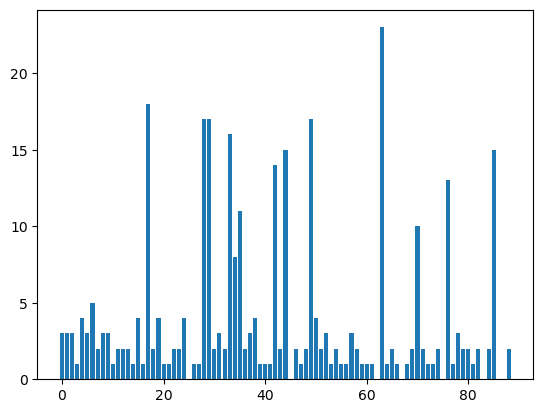

In [16]:
plt.bar(range(len(errs)), errs);

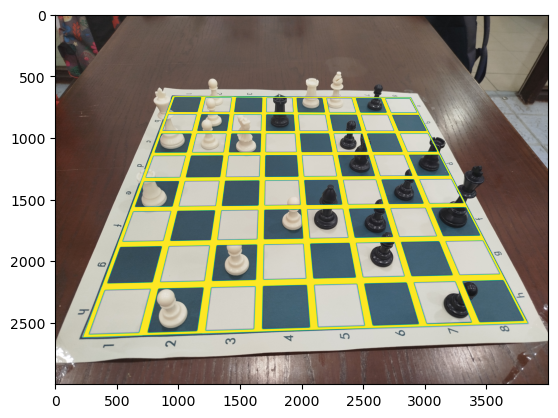

In [6]:
img.preview_board()

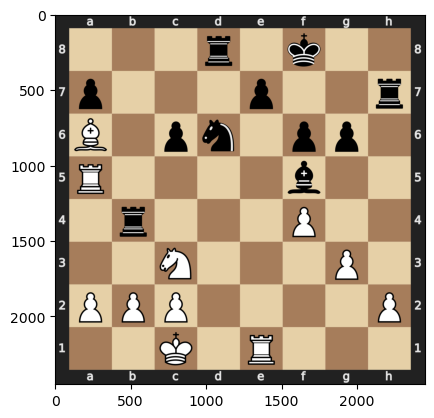

In [7]:
img.save_fen_image()
plt.imshow(plt.imread("out_fen.png"));